### ArkaPlan

ACME Avrupa bankacılık pazarında makine öğrenmesi ile çözümler sağlayan küçük bir startuptır. 
Dolandırıcılık tespiti, duygu analizi , müşteri niyet tahmini ve sınıflandırması dahil olmak üzere çeşitli sorunlar üzerinde çalışmaktadır.


Çağrı merkezi verilerini kullanarak bir makine öğrenim modeli kurulması istenmektedir.


Nihayetinde, ACME'de, müşterilerine sunduğu herhangi bir ürün için müşterilere yapılan aramaların başarı oranının iyileştirilmesi hedefleniyor.

### Veri Açıklaması


Veriler bir Avrupa bankasının vadeli mevduat pazarlama çalışmaları sırasında elde edilmiştir. Pazarlama kampanyası, vadeli mevduat aboneliği sağlamak için müşteriler ile telefon görüşmesi yapılarak gerçekleştirilir. Vadeli mevduatlar genellikle, vadeleri bir aydan birkaç yıla kadar değişen kısa vadeli mevduatlardır. Müşteri, vadeli mevduat satın alırken, ancak vade sona erdikten sonra parasını çekebileceğini anlamalıdır. Kişisel bilgileri açığa çıkarabilecek tüm müşteri bilgileri gizlilik endişeleri nedeniyle kaldırılır.

## Genel Bakış

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [90]:
df = pd.read_csv("term-deposit-marketing-2020.csv")
y = pd.get_dummies(df['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [91]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


### Özellikler

In [92]:
print(df.columns.values)

['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'y']


1. age       : Müşterinin yaşı (numeric)
2. job       : Müşterinin mesleği (categorical)
3. marital   : Medeni durumu (categorical)
4. education : Eğitim durumu (categorical)
5. default   : Temerrüde düşen kredi var mı? (binary)
6. balance   : Euro cinsinden ortalama yıllık bakiye (numeric)
7. housing   : Konut kredisi var mı? (binary)
8. loan      : Kişisel Kredisi var mı? (binary)
9. contact: İletişim türü (categorical)
10. day: ayın son iletişim günüh (numeric)
11. month: yılın son iletişim ayı (categorical)
12. duration: saniye cinsinden son iletişim süresi (numeric)
13. campaign: Bu kampanya sırasında ve bu müşteri için gerçekleştirilen görüşme sayısı (numeric, son görüşmeyi içerir)


### Çıktı(İstenen hedef)

y - Müşteri vadeli mevduata abone oldu mu? (binary)

### Hedef


Müşterinin vadeli mevduata abone olup olmayacağını (evet / hayır) tahmin edin.

### Hangi özellikler numerik ?

Numerik özelliklerimizi inceleyelim. Numerik özelliklerimizin sürekli mi kesiklimi yoksa zaman serisi mi olduğunu belirleyelim.

- Age: Sürekli 
- Balance: Sürekli 
- Duration: Sürekli 
- Campaign Sürekli
- Day: Kategorik

### Hangi özellikler boş değer içeriyor?

In [93]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

Görüldüğü gibi hiçbir özelliğmizde veri kaynağı nedenli eksik veri bulunmamaktadır. Değişkenlerimizin değerlerini inceleyelim.

In [94]:
df.job.unique()
# unknown içeriyor

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [95]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [96]:
df.education.unique()
#unknown içeriyor

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [97]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [98]:
df.contact.unique()
#unknown içeriyor

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [99]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr'], dtype=object)

In [100]:
df.age.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81], dtype=int64)

In [101]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [102]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

In [103]:
df.loan.unique()

array(['no', 'yes'], dtype=object)

In [104]:
df.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [105]:
df.campaign.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

Görüldüğü üzere **job**, **education** ve **contact** özelliklerinde *unknown* değerinde bilinmeyen gözlemler bulunmaktadır.

### Veri türleri neler?

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


- 5 özellik integer
- 9 özellik string

### Numerik özelliklerin dağılımları nelerdir?

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


In [108]:
df.day.value_counts().nlargest(5)

20    2655
18    2173
21    1914
17    1812
6     1778
Name: day, dtype: int64

In [109]:
df.campaign.value_counts().nlargest(5)

1    14718
2    11153
3     4970
4     3297
5     1642
Name: campaign, dtype: int64

- Görüşme yapılan müşterilerin en küçüğü 19 en büyüğü 95 yaşındadır. Müşterilerin ortalama yaşı 40.
- Görüşmeler ortalama 255 saniye sürmüştür.
- En çok görüşme ayın 20. gününde yapılmış
- Bir müşterinin ortalama aranma sayısı yuvarlanmış hali ile 3 tür.
- Müşteriler çoğunlukla 1 kere aranmıştır.

### Kategorik özelliklerin dağılımı nedir?

- Veriseti boyunca tamemen benzersiz olan bir özellik yoktur.
- default, houseing ve loan özellikleri olası iki değer alır. Evet yada hayır.
- Aramalar en çok *May* yani mayıs ayında yapılmıştır.
- Arananların yarısında fazlası evlidir.
- Arananların yarısı ortaöğretim mezunudur.
- Arananların %98'inin temerrüde düşmüş kredisi yoktur.
- Aranaların yarısından fazlası cep telefonu ile iletişim kurmuş.



In [110]:
df.describe(include=['O']).T

,count,unique,top,freq
job,40000,12,blue-collar,9383
marital,40000,3,married,24386
education,40000,4,secondary,20993
default,40000,2,no,39191
housing,40000,2,yes,24031
loan,40000,2,no,33070
contact,40000,3,cellular,24914
month,40000,11,may,13532
y,40000,2,no,37104


In [111]:
df.contact.value_counts()

cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64

In [112]:
df.education.value_counts()

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64

In [113]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [114]:
y_mapping = {"no": 0, "yes": 1}
df['y'] = df['y'].map(y_mapping)

In [115]:
df[["job" , "y"]].groupby(["job"], as_index = False).mean().sort_values(by="y", ascending = False)

,job,y
8,student,0.156489
5,retired,0.105080
10,unemployed,0.086957
4,management,0.082782
6,self-employed,0.079208
0,admin,0.078296
9,technician,0.072534
11,unknown,0.072340
2,entrepreneur,0.062633
7,services,0.060870


Text(0.5, 6.79999999999999, 'Medeni Durum')

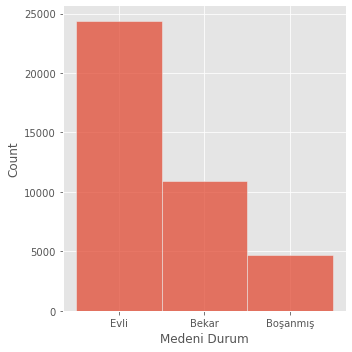

In [116]:
medeni_durum = df.marital
medeni_durum=medeni_durum.map({"married":"Evli","single":"Bekar","divorced":"Boşanmış"})
#sns.displot(df, x="marital")
sns.displot(medeni_durum)
plt.xlabel("Medeni Durum")

In [117]:
#print(df["job"].unique())
print(df["job"].value_counts().iloc[::5])

blue-collar    9383
retired        1437
student         524
Name: job, dtype: int64


In [118]:
df.education.value_counts().nlargest()

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64

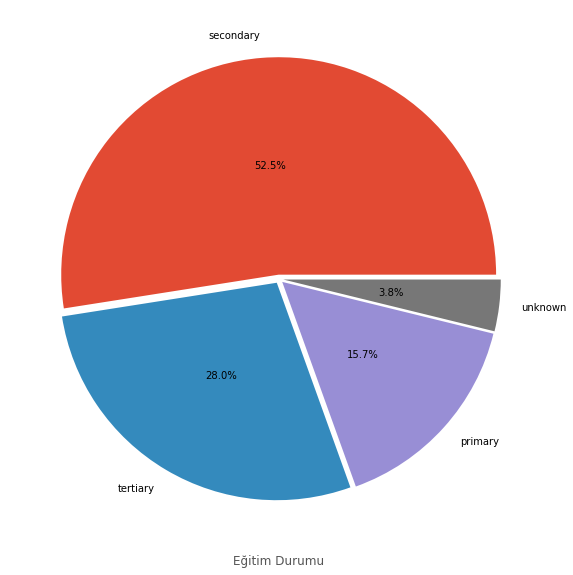

In [119]:
plt.figure(figsize=(10,10))
explodeMeasure = [0.02,0.02,0.02,0.02,]
plt.pie(df["education"].value_counts(),labels = ["secondary","tertiary","primary","unknown"], autopct="%.1f%%",pctdistance=0.5,explode =explodeMeasure )
plt.xlabel("Eğitim Durumu")
plt.show()

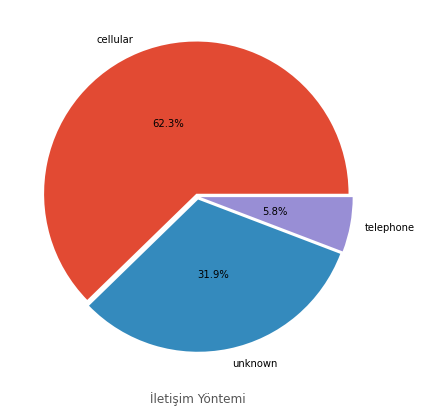

In [120]:
plt.figure(figsize=(7,7))
explodeMeasure = [0.02,0.02,0.02]
plt.pie(df["contact"].value_counts(),labels = ["cellular","unknown","telephone"], autopct="%.1f%%",pctdistance=0.5,explode =explodeMeasure )
plt.xlabel("İletişim Yöntemi")
plt.show()

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 4.3+ MB


### Age 

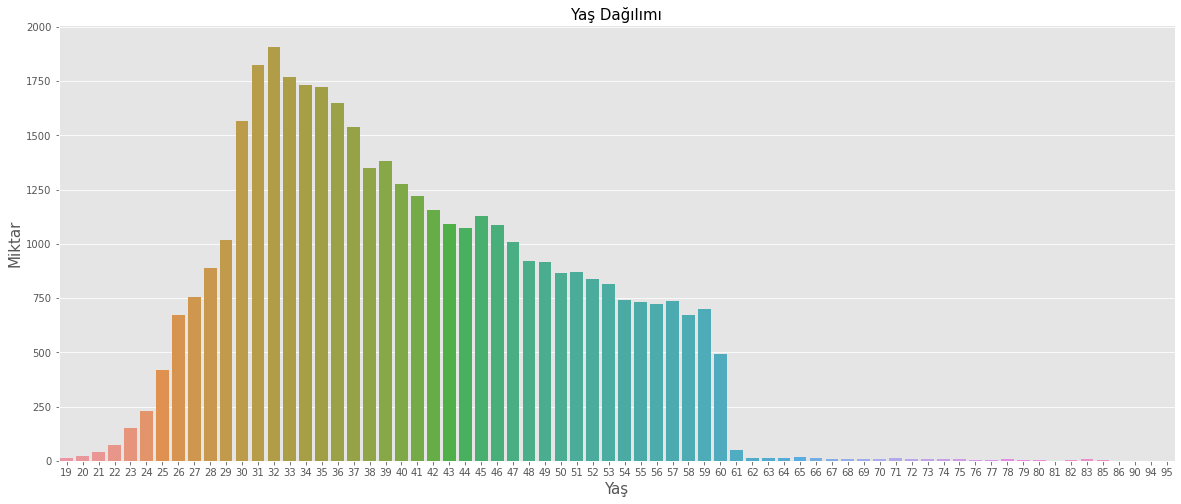

In [122]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Yaş', fontsize=15)
ax.set_ylabel('Miktar', fontsize=15)
ax.set_title("Yaş Dağılımı", fontsize=15)
sns.despine()

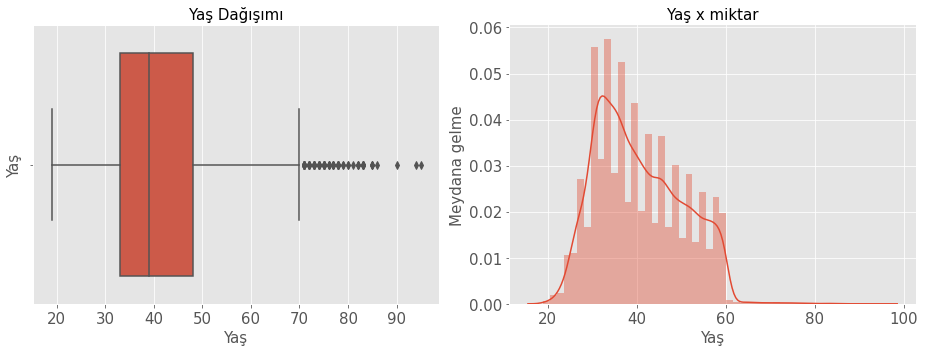

In [123]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('Yaş', fontsize=15)
ax1.set_ylabel('Yaş', fontsize=15)
ax1.set_title('Yaş Dağışımı', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Yaş', fontsize=15)
ax2.set_ylabel('Meydana gelme', fontsize=15)
ax2.set_title('Yaş x miktar', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [124]:
print('1. Kartil: ', df['age'].quantile(q = 0.25))
print('2. Kartil: ', df['age'].quantile(q = 0.50))
print('3. Kartil: ', df['age'].quantile(q = 0.75))
print('4. Kartil: ', df['age'].quantile(q = 1.00))
#Aykrırı gözlemler:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Yaşın üstündekiler: ', df['age'].quantile(q = 0.75) + 
                      1.5*(df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25)), 'aykırı gözlemlerdir')

1. Kartil:  33.0
2. Kartil:  39.0
3. Kartil:  48.0
4. Kartil:  95.0
Yaşın üstündekiler:  70.5 aykırı gözlemlerdir


In [125]:
print('Aykırı gözlem sayısı: ', df[df['age'] > 69.6]['age'].count())
print('Müşteri sayısı: ', len(df))
#Outliers in %
print('Aykırı gözlemler:', round(df[df['age'] > 69.6]['age'].count()*100/len(df),2), '%')

Aykırı gözlem sayısı:  89
Müşteri sayısı:  40000
Aykırı gözlemler: 0.22 %


In [126]:
print('Ortalama:', round(df['age'].mean(), 1))
print('Standart Sapma :', round(df['age'].std(), 1))
print('Varyasyon Katsayısı  :',round(df['age'].std()*100/df['age'].mean(), 1), ', High middle dispersion')

Ortalama: 40.5
Standart Sapma : 9.6
Varyasyon Katsayısı  : 23.8 , High middle dispersion


#### Age yorumu
Age özelliğinde yayvan bir dağılım söz konusudur. Sadece grafiğe bakarak çıktımızla ilgili net bir yorum yapamayabiliriz. Başka örüntüler yakalamaya çalışmalıyız.

### Job

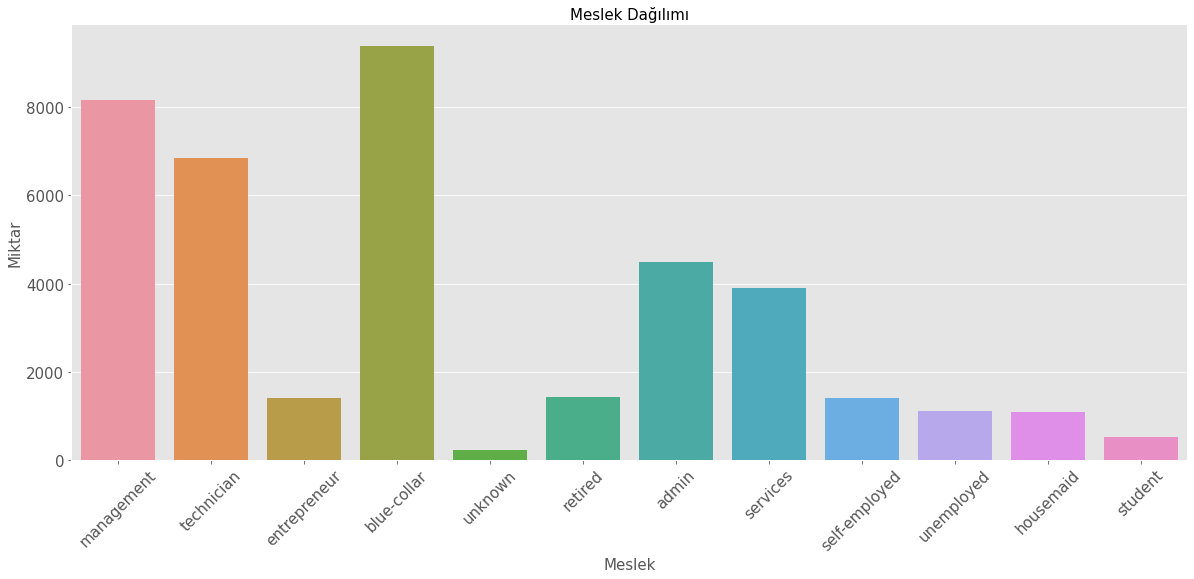

In [127]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Meslek', fontsize=15)
ax.set_ylabel('Miktar', fontsize=15)
ax.set_title('Meslek Dağılımı', fontsize=15)
ax.tick_params(labelsize=15)
plt.xticks(rotation=45)
sns.despine()

### Marital

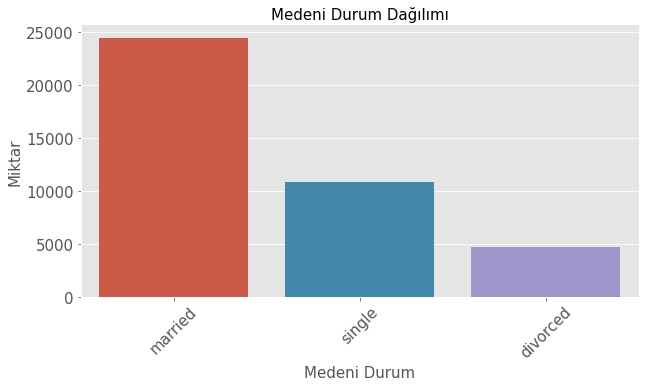

In [128]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = df)
ax.set_xlabel('Medeni Durum', fontsize=15)
ax.set_ylabel('Miktar', fontsize=15)
ax.set_title('Medeni Durum Dağılımı', fontsize=15)
ax.tick_params(labelsize=15)
plt.xticks(rotation=45)
sns.despine()

### Education

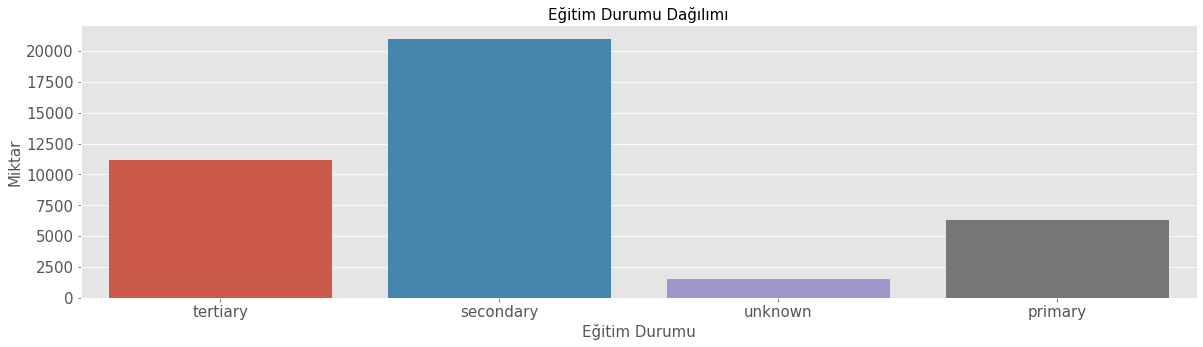

In [129]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = df)
ax.set_xlabel('Eğitim Durumu', fontsize=15)
ax.set_ylabel('Miktar', fontsize=15)
ax.set_title('Eğitim Durumu Dağılımı', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Default, Housing, Loan

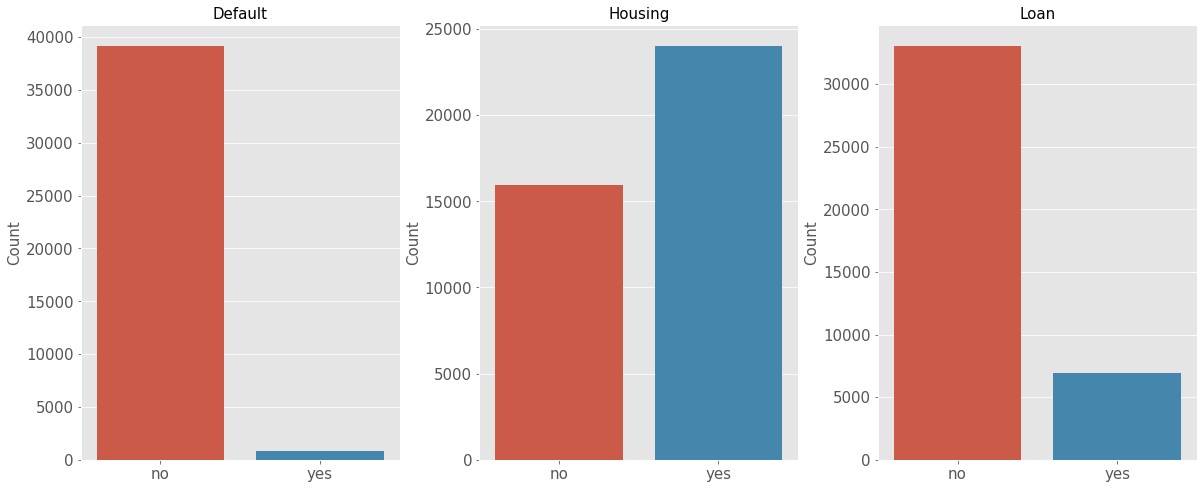

In [130]:
# Default, temerrüde düşmüş mü ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df, ax = ax1, order = ['no', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, ev kredisi var mı ?
sns.countplot(x = 'housing', data = df, ax = ax2, order = ['no', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, kişisel borcu var mı ?
sns.countplot(x = 'loan', data = df, ax = ax3, order = ['no', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [131]:
print('Default:\n Temerrüde düşmüş kredisi yok:'     , df[df['default'] == 'no']['age'].count(),
              '\n Temerrüde düşmüş kredisi var:' , df[df['default'] == 'yes']['age'].count())

Default:
 Temerrüde düşmüş kredisi yok: 39191 
 Temerrüde düşmüş kredisi var: 809


In [132]:
print('Default:\n Ev kredisi yok:'     , df[df['housing'] == 'no']['age'].count(),
              '\n ev kredisi var:'     , df[df['housing'] == 'yes']['age'].count())

Default:
 Ev kredisi yok: 15969 
 ev kredisi var: 24031


In [133]:
print('Default:\n Kişisel kredisi yok:'     , df[df['loan'] == 'no']['age'].count(),
              '\n Kişisel kredisi var:'     , df[df['loan'] == 'yes']['age'].count())

Default:
 Kişisel kredisi yok: 33070 
 Kişisel kredisi var: 6930


### Kategorik verileri işleme

job, marital, education, default, housing ve loan değişkenlerine labelencoder uygulayalım.

In [134]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df['job']      = labelencoder_X.fit_transform(df['job']) 
df['marital']  = labelencoder_X.fit_transform(df['marital']) 
df['education']= labelencoder_X.fit_transform(df['education']) 
df['default']  = labelencoder_X.fit_transform(df['default']) 
df['housing']  = labelencoder_X.fit_transform(df['housing']) 
df['loan']     = labelencoder_X.fit_transform(df['loan']) 

In [135]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,unknown,5,may,261,1,0
1,44,9,2,1,0,29,1,0,unknown,5,may,151,1,0
2,33,2,1,1,0,2,1,1,unknown,5,may,76,1,0
3,47,1,1,3,0,1506,1,0,unknown,5,may,92,1,0
4,33,11,2,3,0,1,0,0,unknown,5,may,198,1,0


Age değişkenini gruplayalım çünkü 78 farklı değer bulunmakta.

In [136]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(df);

In [137]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,3,4,1,2,0,2143,1,0,unknown,5,may,261,1,0
1,2,9,2,1,0,29,1,0,unknown,5,may,151,1,0
2,2,2,1,1,0,2,1,1,unknown,5,may,76,1,0
3,2,1,1,3,0,1506,1,0,unknown,5,may,92,1,0
4,2,11,2,3,0,1,0,0,unknown,5,may,198,1,0


### Son telefon teması analizi

In [138]:
#df.day.value_counts()
df_contact = df[["contact","month","day","duration"]]

In [139]:
df_contact.head()

,contact,month,day,duration
0,unknown,may,5,261
1,unknown,may,5,151
2,unknown,may,5,76
3,unknown,may,5,92
4,unknown,may,5,198


In [140]:
print("İletişim türü: \n", df_contact['contact'].unique())
print("\nKampanya hangi aylarda aktif: \n", df_contact['month'].unique())
print("\nAyın hangi günlerinde müşterilerle görüşülmüş: \n", df_contact['day'].unique())

İletişim türü: 
 ['unknown' 'cellular' 'telephone']

Kampanya hangi aylarda aktif: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']

Ayın hangi günlerinde müşterilerle görüşülmüş: 
 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]


#### Duration

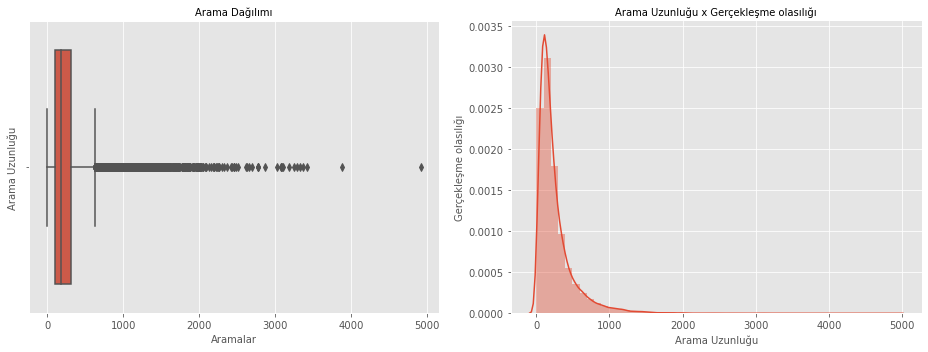

In [141]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = df_contact, orient = 'v', ax = ax1)
ax1.set_xlabel('Aramalar', fontsize=10)
ax1.set_ylabel('Arama Uzunluğu', fontsize=10)
ax1.set_title('Arama Dağılımı', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(df_contact['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Arama Uzunluğu', fontsize=10)
ax2.set_ylabel('Gerçekleşme olasılığı', fontsize=10)
ax2.set_title('Arama Uzunluğu x Gerçekleşme olasılığı', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

Not: duration ve age özelliği birbirinden farklıdır. Age 70 farklı değer duration 1535 farklı değere sahiptir.

In [142]:
print("En uzun çağrı(dk bazında):  ", round((df_contact['duration'].max()/60),1))
print("En kısa çağrı(dk bazında):   ", round((df_contact['duration'].min()/60),1))
print("Ortalama bir çağrının uzunluğu(dk bazında):   ", round((df_contact['duration'].mean()/60),1))
print("Çağrıların standart sapması(dk bazında):   ", round((df_contact['duration'].std()/60),1))

En uzun çağrı(dk bazında):   82.0
En kısa çağrı(dk bazında):    0.0
Ortalama bir çağrının uzunluğu(dk bazında):    4.2
Çağrıların standart sapması(dk bazında):    4.3


In [143]:
print('1. Kartil: ', df_contact['duration'].quantile(q = 0.25))
print('2. Kartil: ', df_contact['duration'].quantile(q = 0.50))
print('3. Kartil: ', df_contact['duration'].quantile(q = 0.75))
print('4. Kartil: ', df_contact['duration'].quantile(q = 1.00))
print('Şu sürenin üzerindeki çağrılar: ', df_contact['duration'].quantile(q = 0.75) + 
                      1.5*(df_contact['duration'].quantile(q = 0.75) - df_contact['duration'].quantile(q = 0.25)), 'aykırı gözlemdir')

1. Kartil:  100.0
2. Kartil:  175.0
3. Kartil:  313.0
4. Kartil:  4918.0
Şu sürenin üzerindeki çağrılar:  632.5 aykırı gözlemdir


In [144]:
print('Aykırı gözlem sayısı: ', df_contact[df_contact['duration'] > 644.5]['duration'].count())
print('Müşteri Sayısı: ', len(df_contact))
print('Aykırı gözlem yüzdesi:%', round(df_contact[df_contact['duration'] > 644.5]['duration'].count()*100/len(df_contact),2))

Aykırı gözlem sayısı:  2861
Müşteri Sayısı:  40000
Aykırı gözlem yüzdesi:% 7.15


Eğer görüşme yapılmadıysa (duration=0) müşteri otomatikmen abone olmamıştır.

### Contact, Month, Day

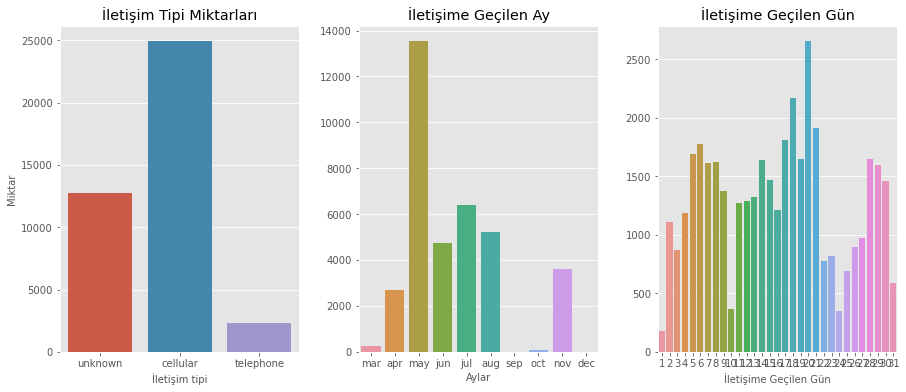

In [145]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(df_contact['contact'], ax = ax1)
ax1.set_xlabel('İletişim tipi', fontsize = 10)
ax1.set_ylabel('Miktar', fontsize = 10)
ax1.set_title('İletişim Tipi Miktarları')
ax1.tick_params(labelsize=10)

sns.countplot(df_contact['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Aylar', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('İletişime Geçilen Ay')
ax2.tick_params(labelsize=10)

sns.countplot(df_contact['day'], ax = ax3)
ax3.set_xlabel('İletişime Geçilen Gün', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('İletişime Geçilen Gün')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)
plt.show()

In [146]:
df.contact.value_counts()

cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64

contact ve month değişkenlerine labelencoder uygulayalım.

In [147]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df['contact']     = labelencoder_X.fit_transform(df['contact']) 
df['month']       = labelencoder_X.fit_transform(df['month']) 

In [148]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,3,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,2,9,2,1,0,29,1,0,2,5,8,151,1,0
2,2,2,1,1,0,2,1,1,2,5,8,76,1,0
3,2,1,1,3,0,1506,1,0,2,5,8,92,1,0
4,2,11,2,3,0,1,0,0,2,5,8,198,1,0


Duration özelliğini gruplara bölüyoruz.

In [149]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(df);

In [150]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,0
1,2,9,2,1,0,29,1,0,2,5,8,2,1,0
2,2,2,1,1,0,2,1,1,2,5,8,1,1,0
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,0
4,2,11,2,3,0,1,0,0,2,5,8,3,1,0


In [151]:
df = df.drop('y', 1)

### Model

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 495)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [153]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
27168,2,3,1,0,0,97,0,1,1,21,9,2,1
13455,2,6,1,1,0,634,1,0,0,9,5,1,1
7277,2,1,1,1,0,628,1,0,2,29,8,4,2
15243,2,4,0,2,0,107,1,0,0,17,5,2,17
15278,2,9,1,2,0,5152,1,1,0,18,5,2,2


In [154]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Lojistik Regresyon

In [155]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

logreg_cm = confusion_matrix(y_test, logpred)
print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7356   77]
 [ 481   86]]
93.0


### K En Yakın Komşu

k=1 88.59 (+/- 0.63)
k=2 92.40 (+/- 0.41)
k=3 91.81 (+/- 0.47)
k=4 92.62 (+/- 0.40)
k=5 92.45 (+/- 0.41)
k=6 92.70 (+/- 0.39)
k=7 92.68 (+/- 0.41)
k=8 92.72 (+/- 0.40)
k=9 92.71 (+/- 0.41)
k=10 92.72 (+/- 0.40)
k=11 92.73 (+/- 0.40)
k=12 92.72 (+/- 0.39)
k=13 92.72 (+/- 0.39)
k=14 92.72 (+/- 0.40)
k=15 92.72 (+/- 0.40)
k=16 92.72 (+/- 0.40)
k=17 92.72 (+/- 0.40)
k=18 92.72 (+/- 0.40)
k=19 92.72 (+/- 0.40)
k=20 92.72 (+/- 0.40)
k=21 92.72 (+/- 0.40)
k=22 92.72 (+/- 0.40)
k=23 92.72 (+/- 0.40)
k=24 92.72 (+/- 0.40)
k=25 92.72 (+/- 0.40)
Optimize edilmiş komşu sayısı: 11 Başarısı: 92.7%


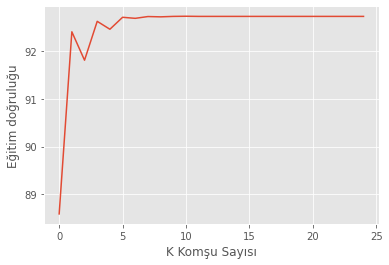

In [156]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(df, y, test_size = 0.2, random_state = 495)


# Model Tuning
#Komşular
neighbors = np.arange(0,25)

#cross validation skorlarını tutacağımız liste
cv_scores = []

#en iyi k yı bulmak için 1-25 arası modelimizi çalıştıralım:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=495)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))+1]
print ("Optimize edilmiş komşu sayısı: %d Başarısı: %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('K Komşu Sayısı')
plt.ylabel('Eğitim doğruluğu')
plt.show()

In [157]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, knnpred)
print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7396   37]
 [ 535   32]]
93.0


### Support Vector Clustering

In [158]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
svc_cm = confusion_matrix(y_test, svcpred)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7003  430]
 [ 439  128]]
89.0


### Karar Ağacı

In [159]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)
dt_cm = confusion_matrix(y_test, dtreepred)
print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7032  401]
 [ 344  223]]
91.0


### Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
rf_cm = confusion_matrix(y_test, rfcpred)
print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7277  156]
 [ 394  173]]
93.0


### Naive Bayes

In [161]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)
gaussiannb_cm = confusion_matrix(y_test, gaussiannbpred)
print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7180  253]
 [ 393  174]]
92.0


### Gradient Boosting

In [162]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
gb_cm = confusion_matrix(y_test, gbkpred)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7313  120]
 [ 387  180]]
94.0


In [163]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, GBKCV]})

models.sort_values(by='Skor', ascending=False,ignore_index=True)

,Models,Score
0,Gradient Boosting,0.935000
1,Random Forest Classifier,0.932750
2,Logistic Model,0.929469
3,K-Near Neighbors,0.929156
4,Gausian NB,0.920750
5,Decision Tree Classifier,0.911719
6,Support Vector Machine,0.893625


Modellerimizin doğruluğunu karşılaştırdığımızda en iyi sonucu Gradient Boosting yöntemi ile sağlıyoruz.

### Hata Matrisleri

In [164]:
predict_models = {"Lojistik Regresyon":logreg_cm,"K En Yakın Komşu":knn_cm ,"SVC":svc_cm,"Karar Ağaçları":dt_cm,"Random Forest":rf_cm,"Naive Bayes":gaussiannb_cm ,"Gradient Boosting":gb_cm}

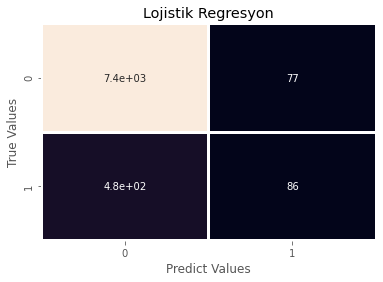

In [168]:

    sns.heatmap(logreg_cm,annot=True,lw=2,cbar=False)
    plt.ylabel("True Values")
    plt.xlabel("Predict Values")
    plt.title("Lojistik Regresyon")
    plt.show()

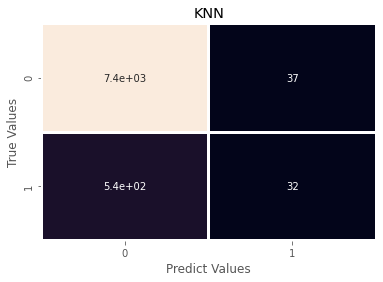

In [175]:

    sns.heatmap(knn_cm,annot=True,lw=2,cbar=False)
    plt.ylabel("True Values")
    plt.xlabel("Predict Values")
    plt.title("KNN")
    plt.show()

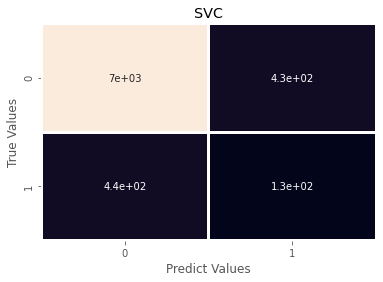

In [176]:

    sns.heatmap(svc_cm,annot=True,lw=2,cbar=False)
    plt.ylabel("True Values")
    plt.xlabel("Predict Values")
    plt.title("SVC")
    plt.show()

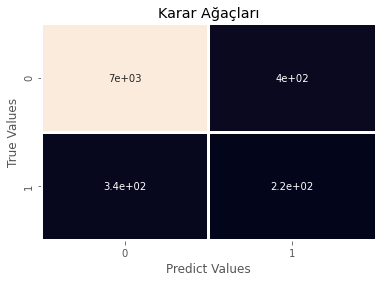

In [177]:

    sns.heatmap(dt_cm,annot=True,lw=2,cbar=False)
    plt.ylabel("True Values")
    plt.xlabel("Predict Values")
    plt.title("Karar Ağaçları")
    plt.show()

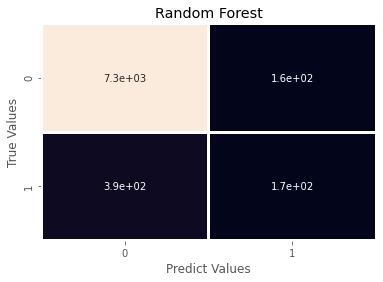

In [178]:

    sns.heatmap(rf_cm,annot=True,lw=2,cbar=False)
    plt.ylabel("True Values")
    plt.xlabel("Predict Values")
    plt.title("Random Forest")
    plt.show()

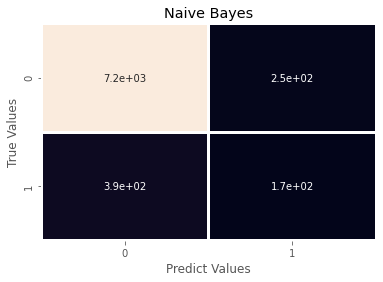

In [179]:

    sns.heatmap(gaussiannb_cm,annot=True,lw=2,cbar=False)
    plt.ylabel("True Values")
    plt.xlabel("Predict Values")
    plt.title("Naive Bayes")
    plt.show()

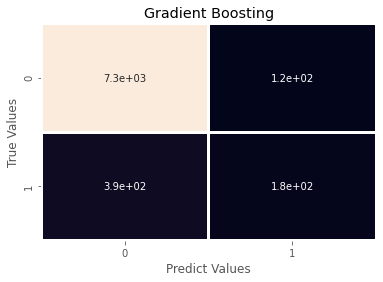

In [180]:

    sns.heatmap(gb_cm,annot=True,lw=2,cbar=False)
    plt.ylabel("True Values")
    plt.xlabel("Predict Values")
    plt.title("Gradient Boosting")
    plt.show()

### Recall, Precision, F-Score

In [188]:
from sklearn.metrics import classification_report
predict_models_ = {"Lojistik Regresyon":logpred,"K En Yakın Komşu":knnpred ,"SVC":svcpred,"Karar Ağaçları":dtreepred,"Random Forest":rfcpred,"Naive Bayes":gaussiannbpred ,"Gradient Boosting":gbkpred}


for model,pred in predict_models_.items():
    print("-"*20,model,"-"*20)
    print(classification_report(y_test,pred))

-------------------- Lojistik Regresyon --------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7433
           1       0.53      0.15      0.24       567

    accuracy                           0.93      8000
   macro avg       0.73      0.57      0.60      8000
weighted avg       0.91      0.93      0.91      8000

-------------------- K En Yakın Komşu --------------------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7433
           1       0.46      0.06      0.10       567

    accuracy                           0.93      8000
   macro avg       0.70      0.53      0.53      8000
weighted avg       0.90      0.93      0.90      8000

-------------------- SVC --------------------
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7433
           1       0.23      0.23      0.23       567

    accuracy    

Bütün bu değerleri göz önüne aldığımızda  Gradient Boosting yönteminin modelimiz için en iyi sonuç olduğu yorumunu çıkartıyoruz.